# Extra1 データ分析

In [ ]:
# 演習に必要なライブラリのインストール
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn

import pprint
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import datasets

## 問題1 データ読み込み

今回の演習では UCI Machine Learning Repository が提供している Wine のデータセットを使用します。[Ref](https://archive.ics.uci.edu/dataset/109/wine)
このデータセットはイタリアの同じ地域で栽培され、3つの異なる品種に由来するワインの化学分析の結果です。

なおデータ定義は以下の通りです。

### target

| 変数名    | 定義     |
|--------|--------|
| target | ワインの種類 |

### feature_names

| 変数名                          | 定義                            |
|------------------------------|-------------------------------|
| alcohol                      | アルコール濃度                       |
| malic_acid                   | リンゴ酸濃度                        |
| ash                          | 灰分濃度                          |
| alcalinity_of_ash            | 灰のアルカリ性                       |
| magnesium                    | マグネシウム量                       |
| total_phenol                 | フェノール量                        |
| flavanoids                   | フラバノイド量                       |
| nonflavanoid_phenols         | 非フラバノイドフェノール類の量               |
| proanthocyanins              | プロアントシアニン                     |
| color_intensity              | 色の強度                          |
| hue                          | 色調                            |
| od280/OD315_of_diluted wines | 薄めたワインの280nmと315nmの波長の光に対する濁度 |
| proline                      | プロリン量                         |

ワインの味と成分についての[参考資料](https://www.jstage.jst.go.jp/article/jbrewsocjapan1915/75/8/75_8_631/_pdf/-char/ja)

### Wine データセットの読み込み

Wine データセットは上で `import` した `sklearn.datasets` に格納されています。
`sklearn.datasets` からデータセットを読み込むには次のコードを実行します。[Ref](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

In [ ]:
wine_data = datasets.load_wine()

実際に読み込んだデータの中身を見ていきましょう。
`Python` の標準ライブラリである `pprint` モジュールを使うと、リスト型や辞書型などのオブジェクトを、整形してきれいに表示できます。[Ref](https://docs.python.org/3/library/pprint.html#module-pprint)

In [ ]:
pprint.pprint(wine_data)

{'DESCR': '.. _wine_dataset:\n'
          '\n'
          'Wine recognition dataset\n'
          '------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          ':Number of Instances: 178\n'
          ':Number of Attributes: 13 numeric, predictive attributes and the '
          'class\n'
          ':Attribute Information:\n'
          '    - Alcohol\n'
          '    - Malic acid\n'
          '    - Ash\n'
          '    - Alcalinity of ash\n'
          '    - Magnesium\n'
          '    - Total phenols\n'
          '    - Flavanoids\n'
          '    - Nonflavanoid phenols\n'
          '    - Proanthocyanins\n'
          '    - Color intensity\n'
          '    - Hue\n'
          '    - OD280/OD315 of diluted wines\n'
          '    - Proline\n'
          '    - class:\n'
          '        - class_0\n'
          '        - class_1\n'
          '        - class_2\n'
          '\n'
          ':Summary Statistics:\n'
          '\n'
       

Wine データセットの詳細、data、特徴量名などが辞書型で格納されていることが分かります。

### 問題1-1

上で読み込んだデータセット `wine_data` から `data` のみを抽出して、出力して下さい。(※ヒントは[こちら](https://docs.python.org/3/tutorial/datastructures.html#dictionaries))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print(wine_data.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


### 問題1-2

問題1-1 で読み込んだデータを pandas の dataframe に変換して下さい。その際変数名は `wine_df`、カラム名は `wine_data.feature_names` を使用して下さい。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

### 問題1-3

問題1-2 で変換した `wine_df` について、上から10行を Notebook 上に表示してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


### 問題1-4

`wine_df` の行数、列数を確認しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print(wine_df.shape[0],wine_df.shape[1])

178 13


### 問題1-5

`wine_df` の列名の一覧を確認しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

### 問題1-6

`wine_df` から、列 `alcohol` を取得してみましょう。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df["alcohol"]

,alcohol
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24
...,...
173,13.71
174,13.40
175,13.27
176,13.17


### 問題1-7

`wine_df` から、列 `color_intensity`, `hue` を取得してみましょう。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df[["color_intensity", "hue"]]

,color_intensity,hue
0,5.64,1.04
1,4.38,1.05
2,5.68,1.03
3,7.80,0.86
4,4.32,1.04
...,...,...
173,7.70,0.64
174,7.30,0.70
175,10.20,0.59
176,9.30,0.60


## 問題2 データ操作

dataframe に対する操作を実践してみましょう。

### 問題2-1

`wine_df` から `magnesium` の値が `100` 以上の行を抽出して、Notebook に表示してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html))

また `magnesium` の値が `100` 以上のものはいくつありますか？

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
magnesium_count = wine_df.loc[wine_df["magnesium"] >= 100]
magnesium_count

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print(len(magnesium_count))

81


### 問題2-2

`wine_df` から `ash` の値の降順で並べ替え、上から10行を Notebook に表示してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df.sort_values(by="ash", ascending=False).head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0


### 問題2-3

`wine_df` を `target` すなわちワインの種類によってグループに分け、`flavanoids` の平均値を計算しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html))

またその結果、平均値が一番小さい `target` はどれですか？

In [ ]:
# wine_df に 新しい列 target を追加する
wine_df['target'] = pd.DataFrame(wine_data.target)

# ===== 以下に解答のコードを入力して下さい =====
wine_av = wine_df.groupby("target").mean()

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print(wine_av["flavanoids"].idxmin())

2


### 問題2-4

`wine_df` の列 `alcohol` に対して、

13%以上は `1`
13%未満は `0`

と出力する関数 `is_alcohol_high` を適用し、新しく `alcohol_high` という変数を作成してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html))

作成したら、結果を下から10行出力して確認してみましょう。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
def is_alcohol_high(alcohol):
  if alcohol >= 13:
    return 1
  else:
    return 0

wine_df["alcohol_high"] = wine_df["alcohol"].apply(is_alcohol_high)

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df["alcohol_high"].tail(10)

,alcohol_high
168,1
169,1
170,0
171,0
172,1
173,1
174,1
175,1
176,1
177,1


## 問題3 統計分析

作成したデータに対して統計分析をしてみましょう。

### 問題3-1

dataframe の `describe` メソッドを使用し、数値データの各種統計量を確認してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html))

特徴量の中で一番標準偏差が大きいものはどれですか？

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
sd = wine_df.describe()

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print(sd.loc['std'].idxmax())

proline


### 問題3-2

dataframeの `plot.hist` メソッドを使用し、`proline` の分布を可視化しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html))

<Axes: ylabel='Frequency'>

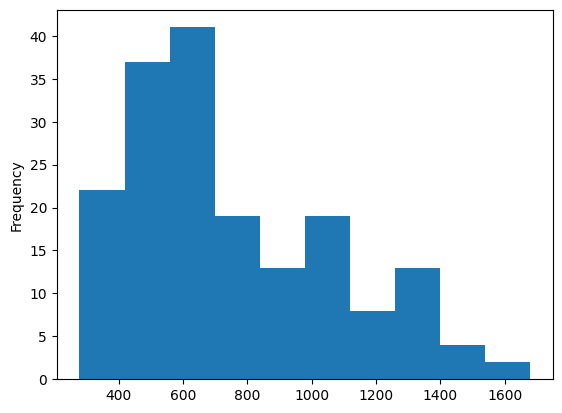

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df["proline"].plot.hist()

### 問題3-3

dataframeの `plot.scatter` メソッドを使用し、`total_phenols`, `flavanoids` の分布を可視化しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html))

また可視化した結果、どんなことが言えそうですか？

<Axes: xlabel='total_phenols', ylabel='flavanoids'>

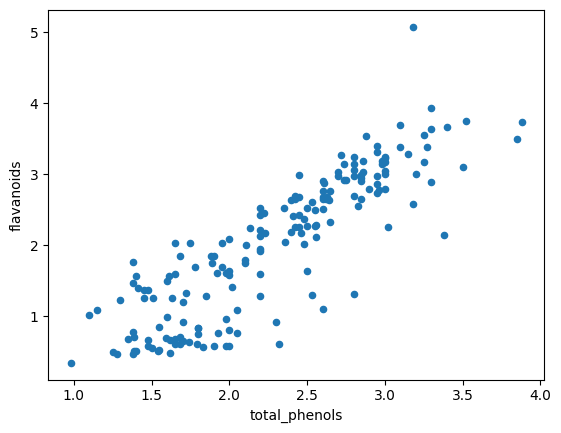

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df.plot.scatter(x="total_phenols", y="flavanoids")

可視化した結果わかること：flavanoidsとtotal_phenolsの間には正の相関がある。

### 問題3-4

dataframeの `corr` メソッドを使用し、`total_phenols`, `flavanoids` の相関係数を計算しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df["total_phenols"].corr(wine_df["flavanoids"])

0.8645635000951151

### 問題4 探索的データ解析（EDA）

EDAを行い、データの特徴や傾向を特定していきましょう。

### 問題4-1

ワインの種類 `target` ごとに特徴量の平均を算出してみましょう。
またその結果、ワインの種類 `target` ごとに差がある特徴量を2つ選択して下さい。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df.groupby("target").mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_high
target,,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.966102
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.112676
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.562500


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
sorted_std = sd.loc['std'].sort_values(ascending=False)
print(sorted_std.head(2))

proline      314.907474
magnesium     14.282484
Name: std, dtype: float64


### 問題4-2

問題4-1 で選択した２つの特徴量で、上手くワインの種類が分類できそうかを散布図を用いて確認してみましょう。

ここでは `seaborn` の `scatterplot` を用いて描画してみましょう。(※ヒントは[こちら](https://seaborn.pydata.org/generated/seaborn.scatterplot.html))

<Axes: xlabel='proline', ylabel='magnesium'>

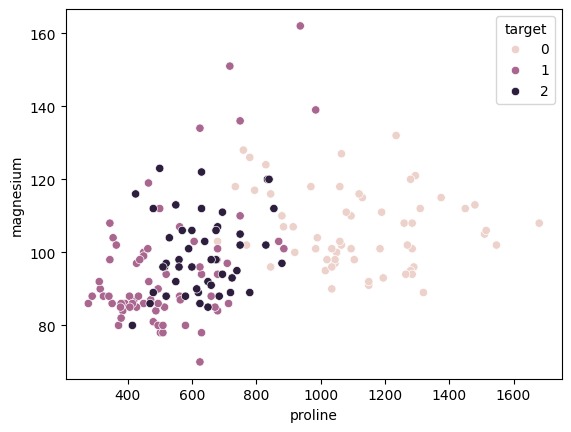

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
sns.scatterplot(data=wine_df, x="proline", y="magnesium",hue="target")

In [ ]:
# 演習に必要なライブラリのインストール
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn

import pprint
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import datasets

## 問題1 データ読み込み

今回の演習では UCI Machine Learning Repository が提供している Wine のデータセットを使用します。[Ref](https://archive.ics.uci.edu/dataset/109/wine)
このデータセットはイタリアの同じ地域で栽培され、3つの異なる品種に由来するワインの化学分析の結果です。

なおデータ定義は以下の通りです。

### target

| 変数名    | 定義     |
|--------|--------|
| target | ワインの種類 |

### feature_names

| 変数名                          | 定義                            |
|------------------------------|-------------------------------|
| alcohol                      | アルコール濃度                       |
| malic_acid                   | リンゴ酸濃度                        |
| ash                          | 灰分濃度                          |
| alcalinity_of_ash            | 灰のアルカリ性                       |
| magnesium                    | マグネシウム量                       |
| total_phenol                 | フェノール量                        |
| flavanoids                   | フラバノイド量                       |
| nonflavanoid_phenols         | 非フラバノイドフェノール類の量               |
| proanthocyanins              | プロアントシアニン                     |
| color_intensity              | 色の強度                          |
| hue                          | 色調                            |
| od280/OD315_of_diluted wines | 薄めたワインの280nmと315nmの波長の光に対する濁度 |
| proline                      | プロリン量                         |

ワインの味と成分についての[参考資料](https://www.jstage.jst.go.jp/article/jbrewsocjapan1915/75/8/75_8_631/_pdf/-char/ja)

### Wine データセットの読み込み

Wine データセットは上で `import` した `sklearn.datasets` に格納されています。
`sklearn.datasets` からデータセットを読み込むには次のコードを実行します。[Ref](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

In [ ]:
wine_data = datasets.load_wine()

実際に読み込んだデータの中身を見ていきましょう。
`Python` の標準ライブラリである `pprint` モジュールを使うと、リスト型や辞書型などのオブジェクトを、整形してきれいに表示できます。[Ref](https://docs.python.org/3/library/pprint.html#module-pprint)

In [ ]:
pprint.pprint(wine_data)

Wine データセットの詳細、data、特徴量名などが辞書型で格納されていることが分かります。

### 問題1-1

上で読み込んだデータセット `wine_data` から `data` のみを抽出して、出力して下さい。(※ヒントは[こちら](https://docs.python.org/3/tutorial/datastructures.html#dictionaries))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題1-2

問題1-1 で読み込んだデータを pandas の dataframe に変換して下さい。その際変数名は `wine_df`、カラム名は `wine_data.feature_names` を使用して下さい。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
wine_df = None

### 問題1-3

問題1-2 で変換した `wine_df` について、上から10行を Notebook 上に表示してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題1-4

`wine_df` の行数、列数を確認しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題1-5

`wine_df` の列名の一覧を確認しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題1-6

`wine_df` から、列 `alcohol` を取得してみましょう。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題1-7

`wine_df` から、列 `color_intensity`, `hue` を取得してみましょう。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


## 問題2 データ操作

dataframe に対する操作を実践してみましょう。

### 問題2-1

`wine_df` から `magnesium` の値が `100` 以上の行を抽出して、Notebook に表示してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html))

また `magnesium` の値が `100` 以上のものはいくつありますか？

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print()

### 問題2-2

`wine_df` から `ash` の値の降順で並べ替え、上から10行を Notebook に表示してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題2-3

`wine_df` を `target` すなわちワインの種類によってグループに分け、`flavanoids` の平均値を計算しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html))

またその結果、平均値が一番小さい `target` はどれですか？

In [ ]:
# wine_df に 新しい列 target を追加する
wine_df['target'] = pd.DataFrame(wine_data.target)

# ===== 以下に解答のコードを入力して下さい =====


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print()

### 問題2-4

`wine_df` の列 `alcohol` に対して、

13%以上は `1`
13%未満は `0`

と出力する関数 `is_alcohol_high` を適用し、新しく `alcohol_high` という変数を作成してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html))

作成したら、結果を下から10行出力して確認してみましょう。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
def is_alcohol_high(alcohol):
    pass

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


## 問題3 統計分析

作成したデータに対して統計分析をしてみましょう。

### 問題3-1

dataframe の `describe` メソッドを使用し、数値データの各種統計量を確認してみましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html))

特徴量の中で一番標準偏差が大きいものはどれですか？

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print()

### 問題3-2

dataframeの `plot.hist` メソッドを使用し、`proline` の分布を可視化しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題3-3

dataframeの `plot.scatter` メソッドを使用し、`total_phenols`, `flavanoids` の分布を可視化しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html))

また可視化した結果、どんなことが言えそうですか？

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print()

### 問題3-4

dataframeの `corr` メソッドを使用し、`total_phenols`, `flavanoids` の相関係数を計算しましょう。(※ヒントは[こちら](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


### 問題4 探索的データ解析（EDA）

EDAを行い、データの特徴や傾向を特定していきましょう。

### 問題4-1

ワインの種類 `target` ごとに特徴量の平均を算出してみましょう。
またその結果、ワインの種類 `target` ごとに差がある特徴量を2つ選択して下さい。

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====


In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
print()
print()

### 問題4-2

問題4-1 で選択した２つの特徴量で、上手くワインの種類が分類できそうかを散布図を用いて確認してみましょう。

ここでは `seaborn` の `scatterplot` を用いて描画してみましょう。(※ヒントは[こちら](https://seaborn.pydata.org/generated/seaborn.scatterplot.html))

In [ ]:
# ===== 以下に解答のコードを入力して下さい =====
